In [1]:
import pandas as pd
import numpy as np
import os 
import time

from sklearn.metrics import confusion_matrix

from multiprocessing import Pool

import matplotlib.pyplot as plt
%matplotlib inline
import itertools
import warnings 
warnings.filterwarnings("ignore")
import matplotlib
matplotlib.rcParams[u'font.sans-serif'] = ['SimHei'] 
matplotlib.rcParams['axes.unicode_minus'] = False

In [7]:
# # 时长对比
# window = [1,3,6,12]
# res_win = []
# for win in window:
#     res = np.load('../results/1_choosing_window_ti'+str(win)+'_DT.npy')
#     res_win.append(res)
    
# list_loc = np.load(".././location.npy",allow_pickle=True)

# fig = plt.figure(figsize = (15,9))
# plt.rcParams['figure.dpi'] = 200 #分辨率
# for acc in res_win:
#     plt.plot(list_loc, # x轴数据
#              acc[1,:,0], # y轴数据
#              linestyle = '-', # 折线类型
#              linewidth = 2, # 折线宽度
#              marker = 'o', # 点的形状
#              markersize = 6, # 点的大小
#              markerfacecolor='brown') # 点的填充色
    
# plt.title('PM2.5等级预测情况')
# plt.xlabel('地点')
# plt.ylabel('等级预测准确率')
# plt.tick_params(top = 'off', right = 'off')
# fig.autofmt_xdate(rotation = 45)
# # 设置图例
# plt.legend(window)
# # 显示图形
# plt.show()

In [13]:
# # 特征对比
# window = ['PM25','PCA','6loc','6all']
# res_win = []
# for win in window:
#     res = np.load('../results/1_choosing_feature_'+str(win)+'_DT.npy')
#     res_win.append(res)
    
# list_loc = np.load(".././location.npy",allow_pickle=True)

# fig = plt.figure(figsize = (15,9))
# plt.rcParams['figure.dpi'] = 200 #分辨率
# for acc in res_win:
#     plt.plot(list_loc, # x轴数据
#              acc[1,:,0], # y轴数据
#              linestyle = '-', # 折线类型
#              linewidth = 2, # 折线宽度
#              marker = 'o', # 点的形状
#              markersize = 6, # 点的大小
#              markerfacecolor='brown') # 点的填充色
    
# plt.title('PM2.5等级预测情况')
# plt.xlabel('地点')
# plt.ylabel('等级预测准确率')
# plt.tick_params(top = 'off', right = 'off')
# fig.autofmt_xdate(rotation = 45)
# # 设置图例
# plt.legend(window)
# # 显示图形
# plt.show()

In [20]:
# # 特征对比
# window = ['class_DT','regre_DT']
# res_win = []
# for win in window:
#     res = np.load('../results/3_choosing_model_'+str(win)+'.npy')
#     res_win.append(res)
    
# list_loc = np.load(".././location.npy",allow_pickle=True)

# fig = plt.figure(figsize = (15,9))
# plt.rcParams['figure.dpi'] = 200 #分辨率
# for acc in res_win:
#     plt.plot(list_loc, # x轴数据
#              acc[1,:,0], # y轴数据
#              linestyle = '-', # 折线类型
#              linewidth = 2, # 折线宽度
#              marker = 'o', # 点的形状
#              markersize = 6, # 点的大小
#              markerfacecolor='brown') # 点的填充色
    
# plt.title('PM2.5等级预测情况')
# plt.xlabel('地点')
# plt.ylabel('等级预测准确率')
# plt.tick_params(top = 'off', right = 'off')
# fig.autofmt_xdate(rotation = 45)
# # 设置图例
# plt.legend(window)
# # 显示图形
# # plt.show()

In [24]:
list_loc = np.load(".././location.npy",allow_pickle=True)

In [76]:
# PR点
Precision = []
Recall = []
models = ['DT','GBRT']
for mo in models:
    pre_all = np.load('../results/4_final_precision_'+str(mo)+'.npy')
    pre_mean = np.mean(pre_all,axis=1)
    pre_mean_ti = np.mean(pre_mean,axis=1)
    Precision.append(pre_mean)
    Precision.append(pre_mean_ti)
    
    rec_all = np.load('../results/4_final_recall_'+str(mo)+'.npy')
    rec_mean = np.mean(rec_all,axis=1)
    rec_mean_ti = np.mean(rec_mean,axis=1)
    Recall.append(rec_mean)
    Recall.append(rec_mean_ti)

In [78]:
Recall[1].shape

(3, 6)

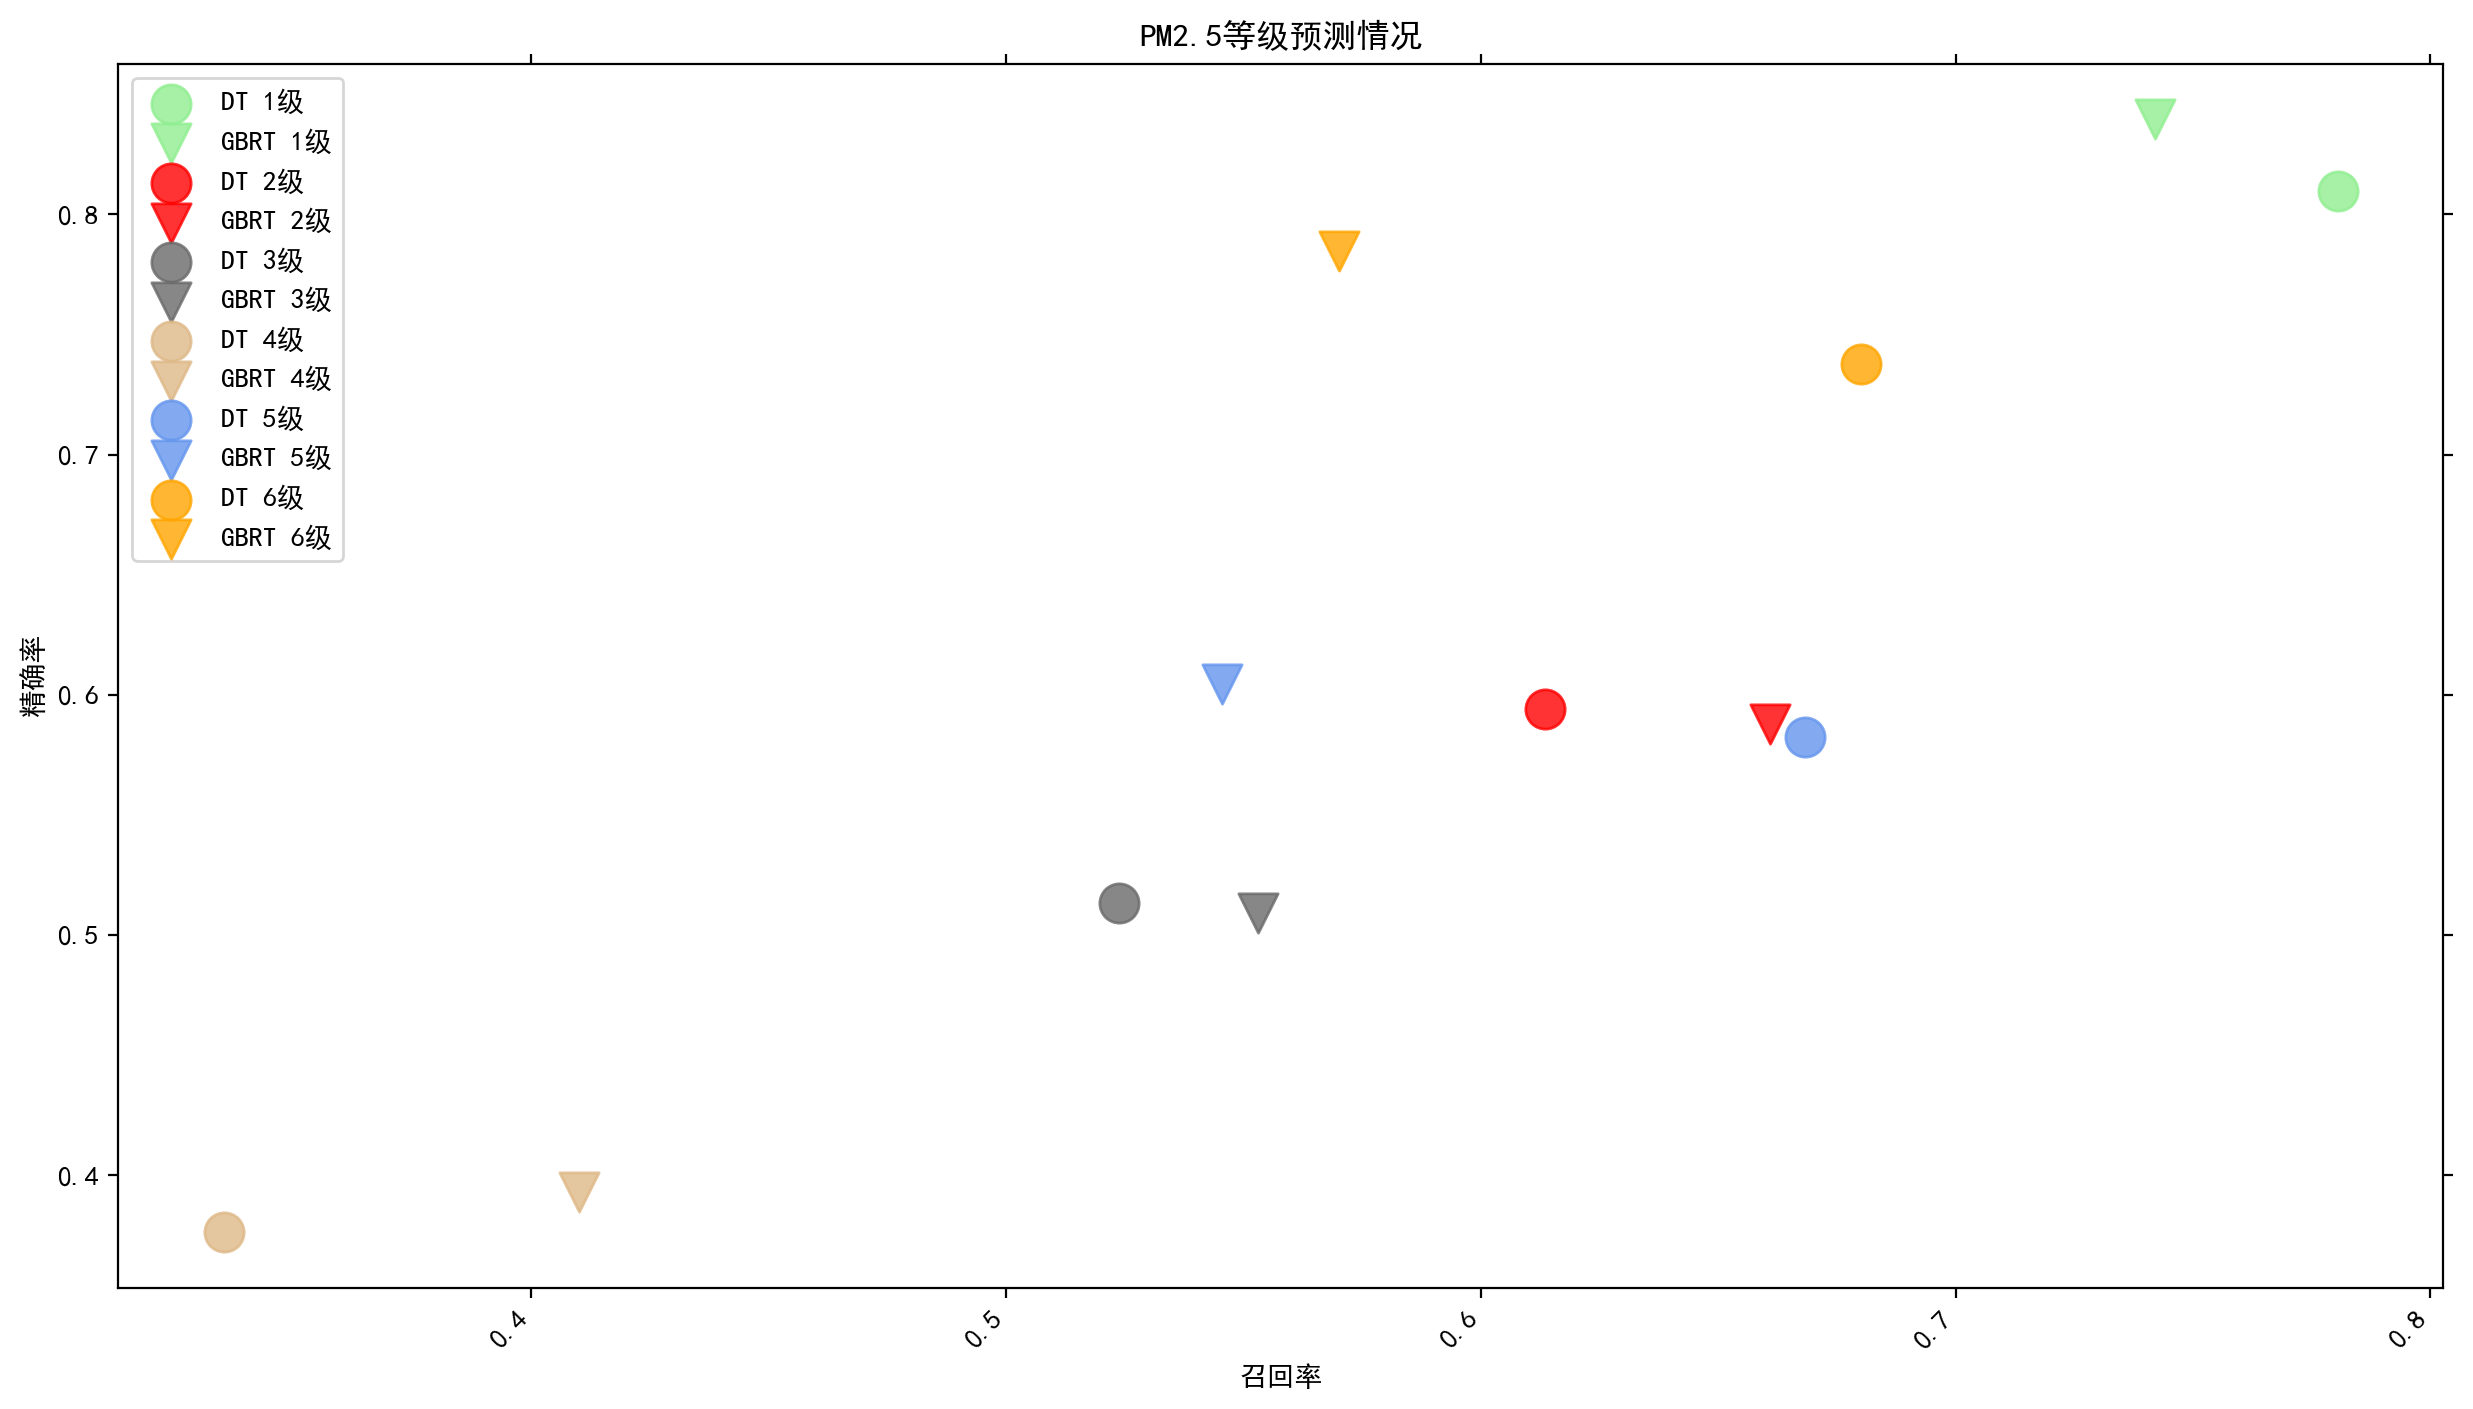

In [79]:
fig = plt.figure(figsize = (15,9))
plt.rcParams['figure.dpi'] = 200 #分辨率

color_list = ['lightgreen','red','dimgray','burlywood',
              'cornflowerblue','orange','seagreen','navy','lightcoral','olive','c','violet']
# for grade in range(6):
#     plt.scatter(Recall[0][2,0,grade],Precision[0][2,0,grade],marker='o',s=200,alpha=0.8,c=color_list[grade])
#     plt.scatter(Recall[1][2,0,grade],Precision[1][2,0,grade],marker='v',s=200,alpha=0.8,c=color_list[grade])

for grade in range(6):
    plt.scatter(Recall[1][2,grade],Precision[1][2,grade],marker='o',s=200,alpha=0.8,c=color_list[grade])
    plt.scatter(Recall[3][2,grade],Precision[3][2,grade],marker='v',s=200,alpha=0.8,c=color_list[grade])


plt.title('PM2.5等级预测情况')
plt.xlabel('召回率')
plt.ylabel('精确率')
plt.tick_params(top = 'off', right = 'off')
fig.autofmt_xdate(rotation = 45)
# 设置图例
plt.legend(['DT 1级','GBRT 1级','DT 2级','GBRT 2级','DT 3级','GBRT 3级','DT 4级','GBRT 4级','DT 5级','GBRT 5级','DT 6级','GBRT 6级'])
# plt.legend(['召回率','精确率'])
# 显示图形
# plt.show()

In [ ]:
# 特征对比
window = ['class_DT','regre_DT']
res_win = []
for win in window:
    res = np.load('../results/3_choosing_model_'+str(win)+'.npy')
    res_win.append(res)
    
list_loc = np.load(".././location.npy",allow_pickle=True)

fig = plt.figure(figsize = (15,9))
plt.rcParams['figure.dpi'] = 200 #分辨率
for acc in res_win:
    plt.plot(list_loc, # x轴数据
             acc[1,:,0], # y轴数据
             linestyle = '-', # 折线类型
             linewidth = 2, # 折线宽度
             marker = 'o', # 点的形状
             markersize = 6, # 点的大小
             markerfacecolor='brown') # 点的填充色
    
plt.title('PM2.5等级预测情况')
plt.xlabel('地点')
plt.ylabel('等级预测准确率')
plt.tick_params(top = 'off', right = 'off')
fig.autofmt_xdate(rotation = 45)
# 设置图例
plt.legend(window)
# 显示图形
# plt.show()

In [ ]:
meta_cls = RandomForestClassifier()
param_dist = {
'criterion': ["gini", "entropy"],
'n_estimators':range(5,21,5),
'max_features': [0.7, 0.8, 0.9, 1],
'max_depth':range(5,31,5),
'bootstrap': [True, False],
'class_weight': [None, "balanced"]
}
searh_model =RandomizedSearchCV(meta_cls, param_distributions = param_dist, n_iter = 100,
scoring = 'accuracy', n_jobs = -1, cv = 3, random_state = 0)
best_model = searh_model.best_estimator_